In [39]:
%load_ext autoreload
from model import dynamics
import numpy as np
from cost import cost
from casadi import *
from solver import ocp_solver
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
freq = 20
h = 1/freq
T = 4
print(T/h)
print(1/freq)

80.0
0.05


In [41]:
%autoreload 
Q = np.diag([120,
             100,
             100,
             1,
             1,
             1,
             1,
             7e-1,
             1.0,
             4.0,
             1e-2,
             1e-2,
             1e-2])
R = np.diag([1, 1, 1, 1])*0.06
timing = {"N":200,
          "T":1,
          "Tf":3, 
          "DMS_RK4_step_size": 1}

solver_bounds = {"upper_pose_limit":[1, 1, 1.5],
                 "lower_pose_limit":[-1, -1, 0],
                 "upper_vel_limit":[10, 10, 10],
                 "lower_vel_limit":[-10, -10, -10],
                 "upper_att_limit":[1,1,1,1],
                 "lower_att_limit":[0,-1,-1,-1],
                 "upper_ang_limit":[10, 10, 10],
                 "lower_ang_limit":[-10, -10, -10],
                 "u_min" : [ 0, 0, 0, 0],
                 "u_max" : [ 22, 22, 22, 22]}

use_prev_as_guess = False 
use_prev_control = False
use_terminal_cost = False, 
use_only_position = False
terminal_cost_weight = 50
degree = 2
opts = False
print(timing["T"]/ timing["N"])

0.005


In [42]:
x_init = [0, 0, 0.2]
x_desired = [0.2, 0.2, 0.2]
method = "DMS"

In [43]:
dms_ocp = ocp_solver( method, Q, R, timing, solver_bounds, use_prev_as_guess, use_prev_control, use_terminal_cost,use_only_position, terminal_cost_weight, degree, opts)

Creating solver
solver created


In [44]:
print("Solver method: ", dms_ocp.method)
print(" Solver" , dms_ocp.solver)
print("Number of shooting nodes: ", dms_ocp.N)

Solver method:  DMS
 Solver None
Number of shooting nodes:  200


In [45]:
%autoreload
dms_ocp.set_initial_values(x_init, x_desired)
# print("Current state: ", dms_ocp.X_opt_current)
# print("Current control: ", dms_ocp.U_opt_current)
# print("x0_hat: ", dms_ocp.x0_hat)
# print("x_ref: ", dms_ocp.x_ref)
# print("x_des : ", dms_ocp.x_des)
# # print("J:" , dms_ocp.J)
# dms_ocp.solve_open_loop()
# print("upper_pose_limit:", *dms_ocp.upper_pose_limit)
# print("lower_pose_limit:", dms_ocp.lower_pose_limit)
# print("upper_vel_limit:", dms_ocp.upper_vel_limit)
# print("lower_vel_limit:", dms_ocp.lower_vel_limit)
# print("upper_att_limit:", dms_ocp.upper_att_limit)
# print("lower_att_limit:", dms_ocp.lower_att_limit)
# print("upper_ang_limit:", dms_ocp.upper_ang_limit)
# print("lower_ang_limit:", dms_ocp.lower_ang_limit)
# print("u_min:", dms_ocp.u_min)
# print("u_max:", dms_ocp.u_max)
# print("upper_bounds:", dms_ocp.upper_bounds)
# print("lower_bounds:", *dms_ocp.lower_bounds)
# print("solver" , dms_ocp.solver)




@1=100, (((((((((((((@1*slack_0)+(@1*slack_1))+(@1*slack_2))+(@1*slack_3))+(@1*slack_4))+(@1*slack_5))+(@1*slack_6))+(@1*slack_7))+(@1*slack_8))+(@1*slack_9))+(@1*slack_10))+(@1*slack_11))+(@1*slack_12))


This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:    33013
Number of nonzeros in inequality constraint Jacobian.:       52
Number of nonzeros in Lagrangian Hessian.............:    30000

Total number of variables............................:     3426
                     variables with only lower bounds:        0
                variables with lower and upper bounds:     3426
                     variables with only upper bounds:        0
Total number of equality constraints.................:     2613
Total number of inequality constraints...............:       26
        inequality constraints with only lower bounds:       26
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

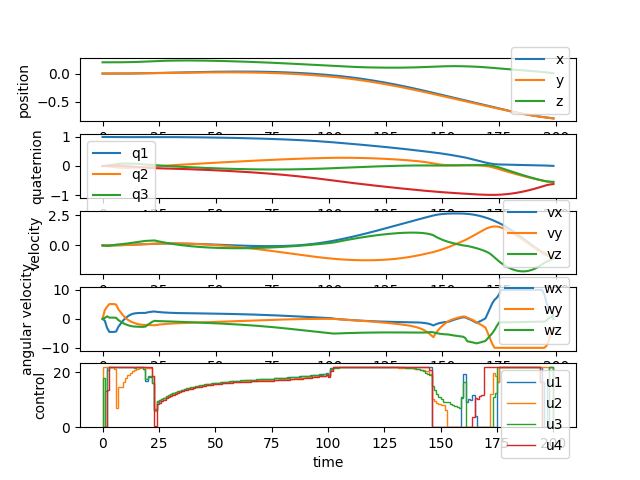

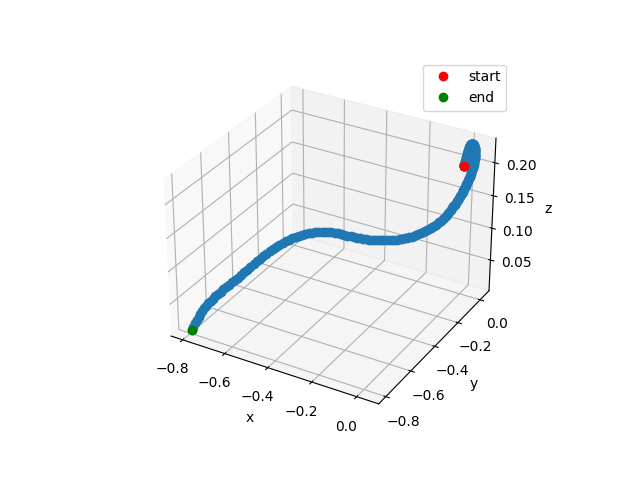

In [46]:
%autoreload
%matplotlib widget
x_open_loop, u_open_loop = dms_ocp.solve_open_loop()
# print(x_open_loop[:,3:7])
def plot(x_open_loop, u_open_loop):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(x_open_loop[:,0], x_open_loop[:,1], x_open_loop[:,2], 'o')
    ax.plot(x_open_loop[0,0], x_open_loop[0,11], x_open_loop[0,2], 'o', color='red', label = 'start')
    ax.plot(x_open_loop[-1,0], x_open_loop[-1,1], x_open_loop[-1,2], 'o', color='green', label = 'end')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.legend()


    #plot the controls
    fig2 = plt.figure()
    ax = fig2.add_subplot(5,1,1)
    ax.plot(x_open_loop[:,0], label = 'x')
    ax.plot(x_open_loop[:,1], label = 'y')
    ax.plot(x_open_loop[:,2], label = 'z')
    ax.legend()
    ax.set_ylabel('position')

    ax = fig2.add_subplot(5,1,2)
    ax.plot(x_open_loop[:,3], label = 'q1')
    ax.plot(x_open_loop[:,4], label = 'q2')
    ax.plot(x_open_loop[:,5], label = 'q3')
    ax.plot(x_open_loop[:,6], label = 'q4')
    ax.legend()
    ax.set_ylabel('quaternion')

    ax = fig2.add_subplot(5,1,3)
    ax.plot(x_open_loop[:,7], label = 'vx')
    ax.plot(x_open_loop[:,8], label = 'vy')
    ax.plot(x_open_loop[:,9], label = 'vz')
    ax.legend()
    ax.set_ylabel('velocity')

    ax = fig2.add_subplot(5,1,4)
    ax.plot(x_open_loop[:,10], label = 'wx')
    ax.plot(x_open_loop[:,11], label = 'wy')
    ax.plot(x_open_loop[:,12], label = 'wz')
    ax.legend()
    ax.set_ylabel('angular velocity')

    ax = fig2.add_subplot(5,1,5)
    ax.stairs(u_open_loop[:,0], label = 'u1')
    ax.stairs(u_open_loop[:,1], label = 'u2')
    ax.stairs(u_open_loop[:,2], label = 'u3')
    ax.stairs(u_open_loop[:,3], label = 'u4')
    ax.legend()
    ax.set_ylabel('control')
    ax.set_xlabel('time')

   
    plt.show()

plot(x_open_loop, u_open_loop)


In [47]:
dms_ocp.mayer
dms_ocp.g[-1]
dms_ocp.J

SX(@1=0.000833333, @2=120, @3=100, @4=0.7, @5=4, @6=0.01, @7=0.06, @8=2, @9=0.0025, @10=1, @11=(X0_0+(@9*(((X0_7*(((@8*sq(X0_3))+(@8*sq(X0_4)))-@10))-(X0_8*(((@8*X0_3)*X0_6)-((@8*X0_4)*X0_5))))+(X0_9*(((@8*X0_3)*X0_5)+((@8*X0_4)*X0_6)))))), @12=(X0_1+(@9*(((X0_8*(((@8*sq(X0_3))+(@8*sq(X0_5)))-@10))+(X0_7*(((@8*X0_3)*X0_6)+((@8*X0_4)*X0_5))))-(X0_9*(((@8*X0_3)*X0_4)-((@8*X0_5)*X0_6)))))), @13=(X0_2+(@9*(((X0_9*(((@8*sq(X0_3))+(@8*sq(X0_6)))-@10))-(X0_7*(((@8*X0_3)*X0_5)-((@8*X0_4)*X0_6))))+(X0_8*(((@8*X0_3)*X0_4)+((@8*X0_5)*X0_6)))))), @14=(X0_3-(@9*((((X0_4*X0_10)/@8)+((X0_5*X0_11)/@8))+((X0_6*X0_12)/@8)))), @15=(X0_4+(@9*((((X0_3*X0_10)/@8)-((X0_6*X0_11)/@8))+((X0_5*X0_12)/@8)))), @16=(X0_5+(@9*((((X0_6*X0_10)/@8)+((X0_3*X0_11)/@8))-((X0_4*X0_12)/@8)))), @17=(X0_6+(@9*((((X0_4*X0_11)/@8)-((X0_5*X0_10)/@8))+((X0_3*X0_12)/@8)))), @18=9.8066, @19=(X0_7+(@9*(((X0_8*X0_12)-(X0_9*X0_11))+(@18*(((@8*X0_3)*X0_5)-((@8*X0_4)*X0_6)))))), @20=(X0_8+(@9*(((X0_9*X0_10)-(X0_7*X0_12))-(@18*(((@8*X0_3

In [48]:
x_init = [0, 0, 0]
x_desired = [0.3, 0.3, 0.2]
method = "DMS"

In [49]:
dms_ocp.set_initial_values(x_init, x_desired)
x_open_loop, u_open_loop = dms_ocp.solve_open_loop()

@1=100, (((((((((((((@1*slack_0)+(@1*slack_1))+(@1*slack_2))+(@1*slack_3))+(@1*slack_4))+(@1*slack_5))+(@1*slack_6))+(@1*slack_7))+(@1*slack_8))+(@1*slack_9))+(@1*slack_10))+(@1*slack_11))+(@1*slack_12))


CasADi - 2023-02-08 15:56:07 WARNING("Duplicate expression: slack_0") [.../casadi/core/sx_instantiator.cpp:174]
CasADi - 2023-02-08 15:56:07 WARNING("Duplicate expression: slack_1") [.../casadi/core/sx_instantiator.cpp:174]
CasADi - 2023-02-08 15:56:07 WARNING("Duplicate expression: slack_2") [.../casadi/core/sx_instantiator.cpp:174]
CasADi - 2023-02-08 15:56:07 WARNING("Duplicate expression: slack_3") [.../casadi/core/sx_instantiator.cpp:174]
CasADi - 2023-02-08 15:56:07 WARNING("Duplicate expression: slack_4") [.../casadi/core/sx_instantiator.cpp:174]
CasADi - 2023-02-08 15:56:07 WARNING("Duplicate expression: slack_5") [.../casadi/core/sx_instantiator.cpp:174]
CasADi - 2023-02-08 15:56:07 WARNING("Duplicate expression: slack_6") [.../casadi/core/sx_instantiator.cpp:174]
CasADi - 2023-02-08 15:56:07 WARNING("Duplicate expression: slack_7") [.../casadi/core/sx_instantiator.cpp:174]
CasADi - 2023-02-08 15:56:07 WARNING("Duplicate expression: slack_8") [.../casadi/core/sx_instantiator.c

RuntimeError: Error in Function::Function for 'nlp' [SXFunction] at .../casadi/core/function.cpp:222:
.../casadi/core/function_internal.cpp:145: Error calling SXFunction::init for 'nlp':
.../casadi/core/x_function.hpp:309: The input expressions are not independent:
0: [X0_0, X0_1, X0_2, ..., slack_10, slack_11, slack_12]
1: [x0_hat_0, x0_hat_1, x0_hat_2, x0_hat_3, x0_hat_4, x0_hat_5, x0_hat_6, x0_hat_7, x0_hat_8, x0_hat_9, x0_hat_10, x0_hat_11, x0_hat_12, x_ref_0, x_ref_1, x_ref_2, x_ref_3, x_ref_4, x_ref_5, x_ref_6, x_ref_7, x_ref_8, x_ref_9, x_ref_10, x_ref_11, x_ref_12]


In [ ]:
plot(x_open_loop, u_open_loop)

In [ ]:
%autoreload
method = "DC"
timing = {"N":80,
          "T":4,
          "Tf":3, 
          "DMS_RK4_step_size": 2}
use_prev_as_guess = False
use_prev_control = False
use_terminal_cost = True
use_only_position = False
terminal_cost_weight = 50
opts = False
degree = 3
x_init = [0, 0, 0.2]
x_desired = [0, 0, 0.25]
dc_ocp = ocp_solver( method, Q, R, timing, solver_bounds, use_prev_as_guess, use_prev_control, use_terminal_cost,use_only_position, terminal_cost_weight, degree, opts)
dc_ocp.set_initial_values(x_init, x_desired)
# print(dc_ocp.w)
x, u = dc_ocp.solve_open_loop()
# print("Current state: ", dc_ocp.X_opt_current)
# print("Current control: ", dc_ocp.U_opt_current)
# print("x0_hat: ", dc_ocp.x0_hat)
# print("x_ref: ", dc_ocp.x_ref)
# print("x_des : ", dc_ocp.x_des)
# # print("J:" , dc_ocp.J)
# x, u = dc_ocp.solve_open_loop()
# print("upper_pose_limit:", dc_ocp.upper_pose_limit)
# print("lower_pose_limit:", dc_ocp.lower_pose_limit)
# print("upper_vel_limit:", dc_ocp.upper_vel_limit)
# print("lower_vel_limit:", dc_ocp.lower_vel_limit)
# print("upper_att_limit:", dc_ocp.upper_att_limit)
# print("lower_att_limit:", dc_ocp.lower_att_limit)
# print("upper_ang_limit:", dc_ocp.upper_ang_limit)
# print("lower_ang_limit:", dc_ocp.lower_ang_limit)
# print("u_min:", dc_ocp.u_min)
# print("u_max:", dc_ocp.u_max)
# print("upper_bounds:", dc_ocp.upper_bounds)
# print("lower_bounds:", dc_ocp.lower_bounds)
# print("solver" , dc_ocp.solver)


plot(x, u)


In [ ]:
x.shape

In [ ]:
u

In [ ]:
%autoreload
timing = {"N":20,
          "T":0.5,
          "Tf":5, 
          "DMS_RK4_step_size": 2}
opts = True
method = "DMS"
use_prev_as_guess = False
use_prev_control = True
use_terminal_cost = True
use_only_position = False
terminal_cost_weight = 50
method = "DMS"
dms_ocp = ocp_solver( method, Q, R, timing, solver_bounds, use_prev_as_guess, use_prev_control, use_terminal_cost,use_only_position, terminal_cost_weight, degree, opts)
x_init = [0, 0, 0.2]
x_desired = [0.4, 0.4, 0.4]
dms_ocp.set_initial_values(x_init, x_desired)
print("solver created")

for i in range(150):
    dms_ocp.w0 = dms_ocp.w_opt
    dms_ocp.solve_for_next_state()
    print("current pose ", dms_ocp.X_opt_current[:3])
    dms_ocp.extract_next_state(i)
plot(dms_ocp.X_opt[:i,:], dms_ocp.U_opt[:i,:])

In [ ]:
plot(dms_ocp.X_opt, dms_ocp.U_opt)

In [ ]:
%matplotlib inline
plot(dms_ocp.X_opt[:i,:], dms_ocp.U_opt[:i,:])

In [ ]:
phi_list = []
theta_list = []
psi_list = []
def quat_2_euler():
    for j in range(i):
        q = np.array(dms_ocp.X_opt[j,3:7])
        w, x, y, z = q
        R11 = 2*(w*w + x*x) - 1
        R21 = 2*(x*y - w*z)
        R31 = 2*(x*z + w*y)
        R32 = 2*(y*z - w*x)
        R33 = 2*(w*w + z*z) - 1
        phi = np.arctan2(R32, R33)
        theta = -np.arcsin(R31)
        psi = np.arctan2(R21, R11)
        phi_list.append(phi)
        theta_list.append(theta)
        psi_list.append(psi)
quat_2_euler() 

def rad2deg(angle):
    return angle * 180/pi

def rpm_to_thrust(U) :
    thrust = 1.0942e-07 * (U*1000)**2 - 2.1059e-04 * U*1000 + 1.5417e-01
    return thrust

max_thrust = rpm_to_thrust(22)
def thrust_value_to_drone(thrust):
    total_thrust = ((np.sum(thrust, axis = 0)/4)/rpm_to_thrust(22)) *50000 + 10001 
    

In [ ]:
phi_list = rad2deg(np.array(phi_list))
theta_list = rad2deg(np.array(theta_list))
psi_list = rad2deg(np.array(theta_list))
yaw_rate = rad2deg(dms_ocp.X_opt[:,12])
thrust = thrust_value_to_drone(rpm_to_thrust(dms_ocp.U_opt))

In [ ]:
t = (np.sum(rpm_to_thrust(dms_ocp.U_opt),1)/4)/rpm_to_thrust(22)*50000 +10001
print(t)

In [ ]:
print( "{}, {}, {}, {}".format(phi_list, theta_list, yaw_rate, t))

In [ ]:
dms_ocp.w_opt[-1]